<a href="https://colab.research.google.com/github/ThanhfVux2102/Classification-Charactors-Projects/blob/main/MSINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.6273 - sparse_categorical_accuracy: 0.8260 - val_loss: 0.1851 - val_sparse_categorical_accuracy: 0.9459
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1707 - sparse_categorical_accuracy: 0.9511 - val_loss: 0.1306 - val_sparse_categorical_accuracy: 0.9633
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9693
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.0940 - val_sparse_categorical_accuracy: 0.9723
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.0855 - val_sparse_categorical_accuracy: 0.9729
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0590 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9755
1/1 ━━━━━━━━━━━━━━━━

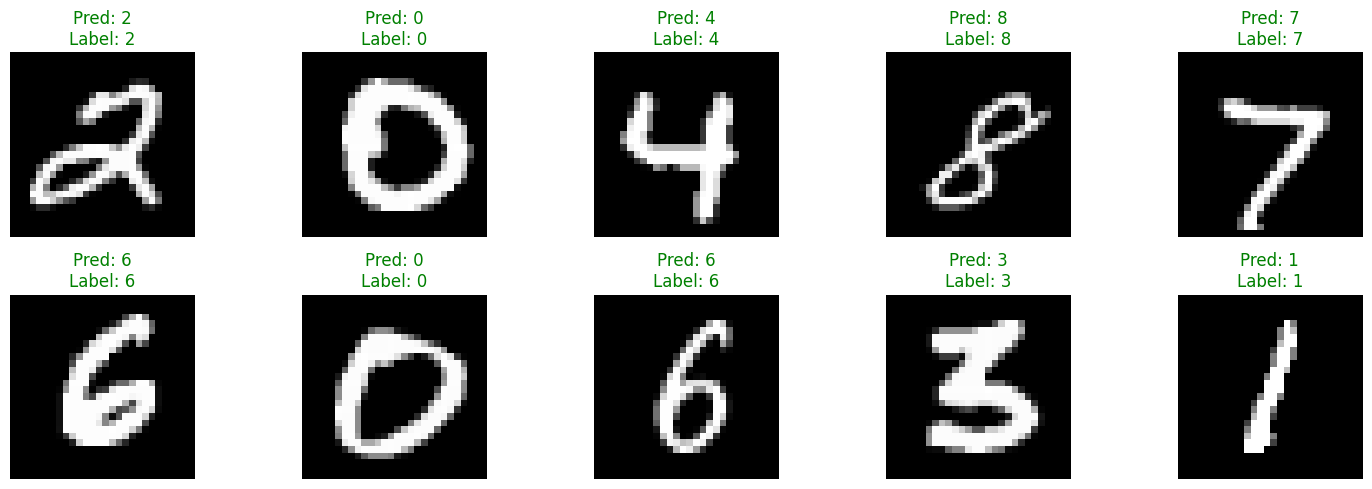

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split= ['train','test'],
    shuffle_files = True,
    as_supervised = True,
    with_info = True,

)

# for preprocessing
def normalize_img(image,labels) :
  return tf.cast(image, tf.float32)/255, labels

ds_train = ds_train.map(normalize_img, num_parallel_calls= tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)   # weights for each interation
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


# rating perform
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

# data modeling - train

## sequential - set up
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu') , # define algo to model learning
    tf.keras.layers.Dense(10)   # 10 node for 10 different data's types


])


## compiling - configuring how to model learning

model.compile(
    # update weights
    optimizer = tf.keras.optimizers.Adam(0.001),
    # calculate loss -- LOTS OF DOCS NOT NOTICE YET
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    # Monitoring model's training -- LOTS OF DOCS NOT NOTICE YET
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],



)


model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)



# preview

def predictions(model, ds_test, n_samples = 10) :

  ## first stage : get first pair
  ### logic : next(iter()) -> get the first interaction
  ###         seperation from 128 elements to 1 element by unbatch and continue batch 10 elements

  images, labels = next(iter(ds_test.unbatch().batch(n_samples)))

  ### raw prediction
  logits = model.predict(images)
  ### output prediction
  predictions = tf.argmax(logits, axis = 1)  # argmax = choose the most correctly



  ## second stage : draw picture and result
  plt.figure(figsize=(15, 5))
  for i in range(n_samples):
      plt.subplot(2, 5, i + 1)
      ### show ảnh
      plt.imshow(images[i], cmap='gray')

      ### attaching title
      plt.title(f"Pred: {predictions[i].numpy()}\nLabel: {labels[i].numpy()}",
                  color="green" if predictions[i] == labels[i] else "red")
      plt.axis('off')
  plt.tight_layout()
  plt.show()


predictions(model, ds_test)




